In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#双线性插值算法
def bilinear_interpolation(img,out_dim):
    src_h, src_w, channel = img.shape
    dst_h, dst_w = out_dim[1], out_dim[0]
    print ("src_h, src_w = ", src_h, src_w)
    print ("dst_h, dst_w = ", dst_h, dst_w)
    if src_h == dst_h and src_w == dst_w:
        return img.copy()
    dst_img = np.zeros((dst_h,dst_w,3),dtype=np.uint8)
    scale_x, scale_y = float(src_w) / dst_w, float(src_h) / dst_h
    for i in range(3):
        for dst_y in range(dst_h):
            for dst_x in range(dst_w):
 
                # find the origin x and y coordinates of dst image x and y
                # use geometric center symmetry
                # if use direct way, src_x = dst_x * scale_x
                src_x = (dst_x + 0.5) * scale_x-0.5
                src_y = (dst_y + 0.5) * scale_y-0.5
 
                # find the coordinates of the points which will be used to compute the interpolation
                src_x0 = int(np.floor(src_x))
                src_x1 = min(src_x0 + 1 ,src_w - 1)
                src_y0 = int(np.floor(src_y))
                src_y1 = min(src_y0 + 1, src_h - 1)
 
                # calculate the interpolation
                temp0 = (src_x1 - src_x) * img[src_y0,src_x0,i] + (src_x - src_x0) * img[src_y0,src_x1,i]
                temp1 = (src_x1 - src_x) * img[src_y1,src_x0,i] + (src_x - src_x0) * img[src_y1,src_x1,i]
                dst_img[dst_y,dst_x,i] = int((src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)
 
    return dst_img

src_h, src_w =  512 512
dst_h, dst_w =  700 700


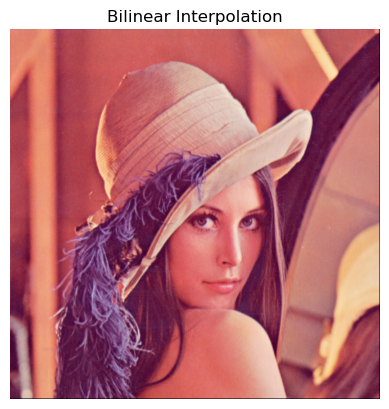

In [3]:
img = cv2.imread('lenna.png')
dst = bilinear_interpolation(img,(700,700))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Bilinear Interpolation')
plt.axis('off')  # Turn off the axis labels
plt.show()

[[[125 137 226]
  [125 137 226]
  [125 137 226]
  ...
  [110 130 221]
  [ 90  99 200]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [125 137 226]
  ...
  [110 130 221]
  [ 90  99 200]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [125 137 226]
  ...
  [110 130 221]
  [ 90  99 200]
  [ 90  99 200]]

 ...

 [[ 57  22  82]
  [ 57  22  82]
  [ 57  22  82]
  ...
  [ 81  71 181]
  [ 81  74 185]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 57  22  82]
  ...
  [ 81  71 181]
  [ 81  74 185]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 57  22  82]
  ...
  [ 81  71 181]
  [ 81  74 185]
  [ 81  74 185]]]
(800, 800, 3)


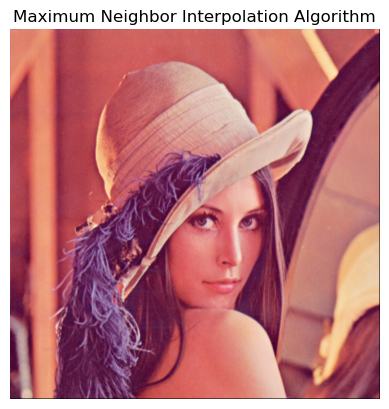

In [4]:
#最大邻近插值算法
import cv2
import numpy as np
def function(img):
    height,width,channels =img.shape
    emptyImage=np.zeros((800,800,channels),np.uint8)
    sh=800/height
    sw=800/width
    for i in range(800):
        for j in range(800):
            x=int(i/sh + 0.5)  #int(),转为整型，使用向下取整。
            y=int(j/sw + 0.5)
            emptyImage[i,j]=img[x,y]
    return emptyImage
    
# cv2.resize(img, (800,800,c),near/bin)

img=cv2.imread("lenna.png")
zoom=function(img)
print(zoom)
print(zoom.shape)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Maximum Neighbor Interpolation Algorithm')
plt.axis('off')  # Turn off the axis labels
plt.show()

[[162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 ...
 [ 42  42  49 ... 104 100  98]
 [ 43  43  54 ... 103 105 108]
 [ 43  43  54 ... 103 105 108]]
image show gray: [[162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 [162 162 162 ... 169 155 128]
 ...
 [ 42  42  49 ... 104 100  98]
 [ 43  43  54 ... 103 105 108]
 [ 43  43  54 ... 103 105 108]]
---image lenna----
[[[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 [[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 [[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [

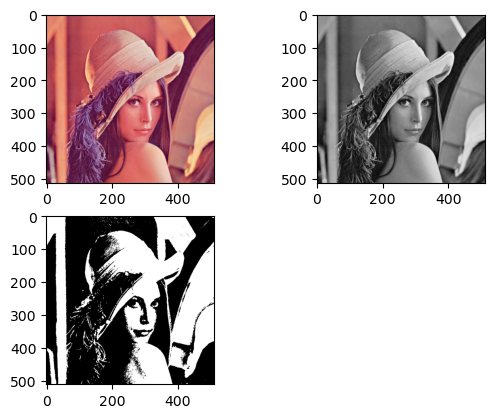

In [5]:
# -*- coding: utf-8 -*-
"""
@author: Michael

彩色图像的灰度化、二值化
"""
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# 灰度化
img = cv2.imread("lenna.png")
h,w = img.shape[:2]                               #获取图片的high和wide
img_gray = np.zeros([h,w],img.dtype)                   #创建一张和当前图片大小一样的单通道图片
for i in range(h):
    for j in range(w):
        m = img[i,j]                             #取出当前high和wide中的BGR坐标
        img_gray[i,j] = int(m[0]*0.11 + m[1]*0.59 + m[2]*0.3)   #将BGR坐标转化为gray坐标并赋值给新图像
print (img_gray)
print("image show gray: %s"%img_gray)
cv2.imshow("image show gray",img_gray)


plt.subplot(221)
img = plt.imread("lenna.png") 
# img = cv2.imread("lenna.png", False) 
plt.imshow(img)
print("---image lenna----")
print(img)

# 灰度化
img_gray = rgb2gray(img)
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray = img
plt.subplot(222)
plt.imshow(img_gray, cmap='gray')
print("---image gray----")
print(img_gray)

# 二值化
# rows, cols = img_gray.shape
# for i in range(rows):
#     for j in range(cols):
#         if (img_gray[i, j] <= 0.5):
#             img_gray[i, j] = 0
#         else:
#             img_gray[i, j] = 1
 
img_binary = np.where(img_gray >= 0.5, 1, 0) 
print("-----imge_binary------")
print(img_binary)
print(img_binary.shape)

plt.subplot(223) 
plt.imshow(img_binary, cmap='gray')
plt.show()